# Лабораторная работа 6
Детекция объектов на архитектуре YOLO

In [ ]:
import yaml
from google.colab import drive
!pip install ultralytics
from ultralytics import YOLO

import glob
from IPython.display import Image, display

from PIL import Image as Img
import matplotlib.pyplot as plt

import os
import time

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.2 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
drive.mount('/content/drive')

NameError: name 'drive' is not defined

https://universe.roboflow.com/people-detection-qnzez/people-detection-kpqn3/dataset/9#

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="key")
project = rf.workspace("people-detection-qnzez").project("people-detection-kpqn3")
version = project.version(9)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 100.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to People-Detection-9 in yolov8:: 100%|██████████| 15344/15344 [00:06<00:00, 2292.09it/s]


'!pip install roboflow\n\nfrom roboflow import Roboflow\nrf = Roboflow(api_key="uWbyKr4tRhK1GMlWWHVg")\nproject = rf.workspace("people-detection-qnzez").project("people-detection-kpqn3")\nversion = project.version(9)\ndataset = version.download("yolov8")'

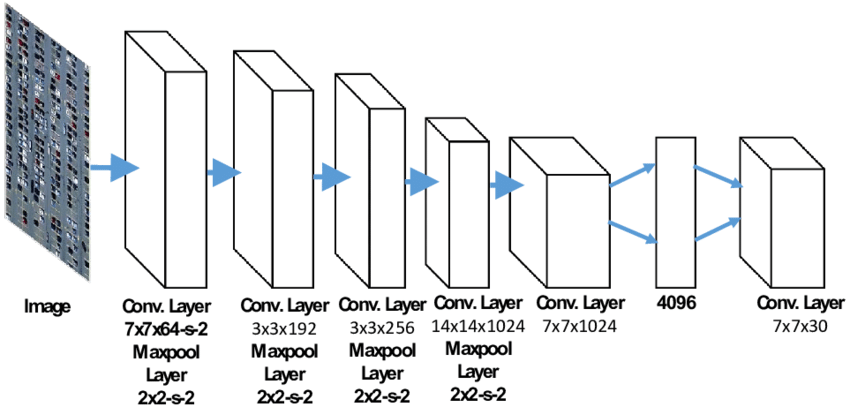

In [ ]:
model = YOLO('yolov8n.pt')

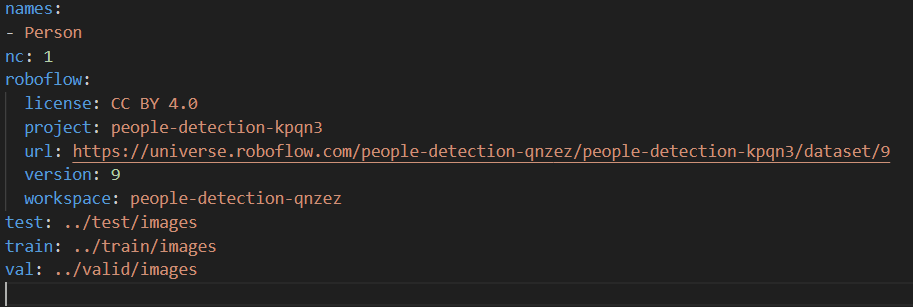

In [ ]:
model.train(
    data=dataset.location + "/data.yaml",
    epochs=30,
    imgsz=640,
    batch=16,
    name="people_yolov8"
    #name="cats_yolov8_pretrained"
)


Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/People-Detection-9/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=people_yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, p

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79ac9f6ee0c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# mAP -- mean average precision

In [ ]:
results = model.val()

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1711.4±1195.3 MB/s, size: 77.9 KB)
val: Scanning /content/People-Detection-9/valid/labels.cache... 635 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 635/635 1.4Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 40/40 5.1it/s 7.8s
                   all        635       1907      0.805       0.71      0.781      0.396
Speed: 1.7ms preprocess, 3.8ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to /content/runs/detect/val2


In [ ]:
success = model.export(format='onnx')

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/runs/detect/people_yolov8/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<=1.19.1', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 14 packages in 289ms
Prepared 6 packages in 4.08s
Installed 6 packages in 367ms
 + colorama==0.4.6
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnx==1.19.1
 + onnxruntime-gpu==1.23.2
 + onnxslim==0.1.74

requirements: AutoUpdate success ✅ 5.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.74.

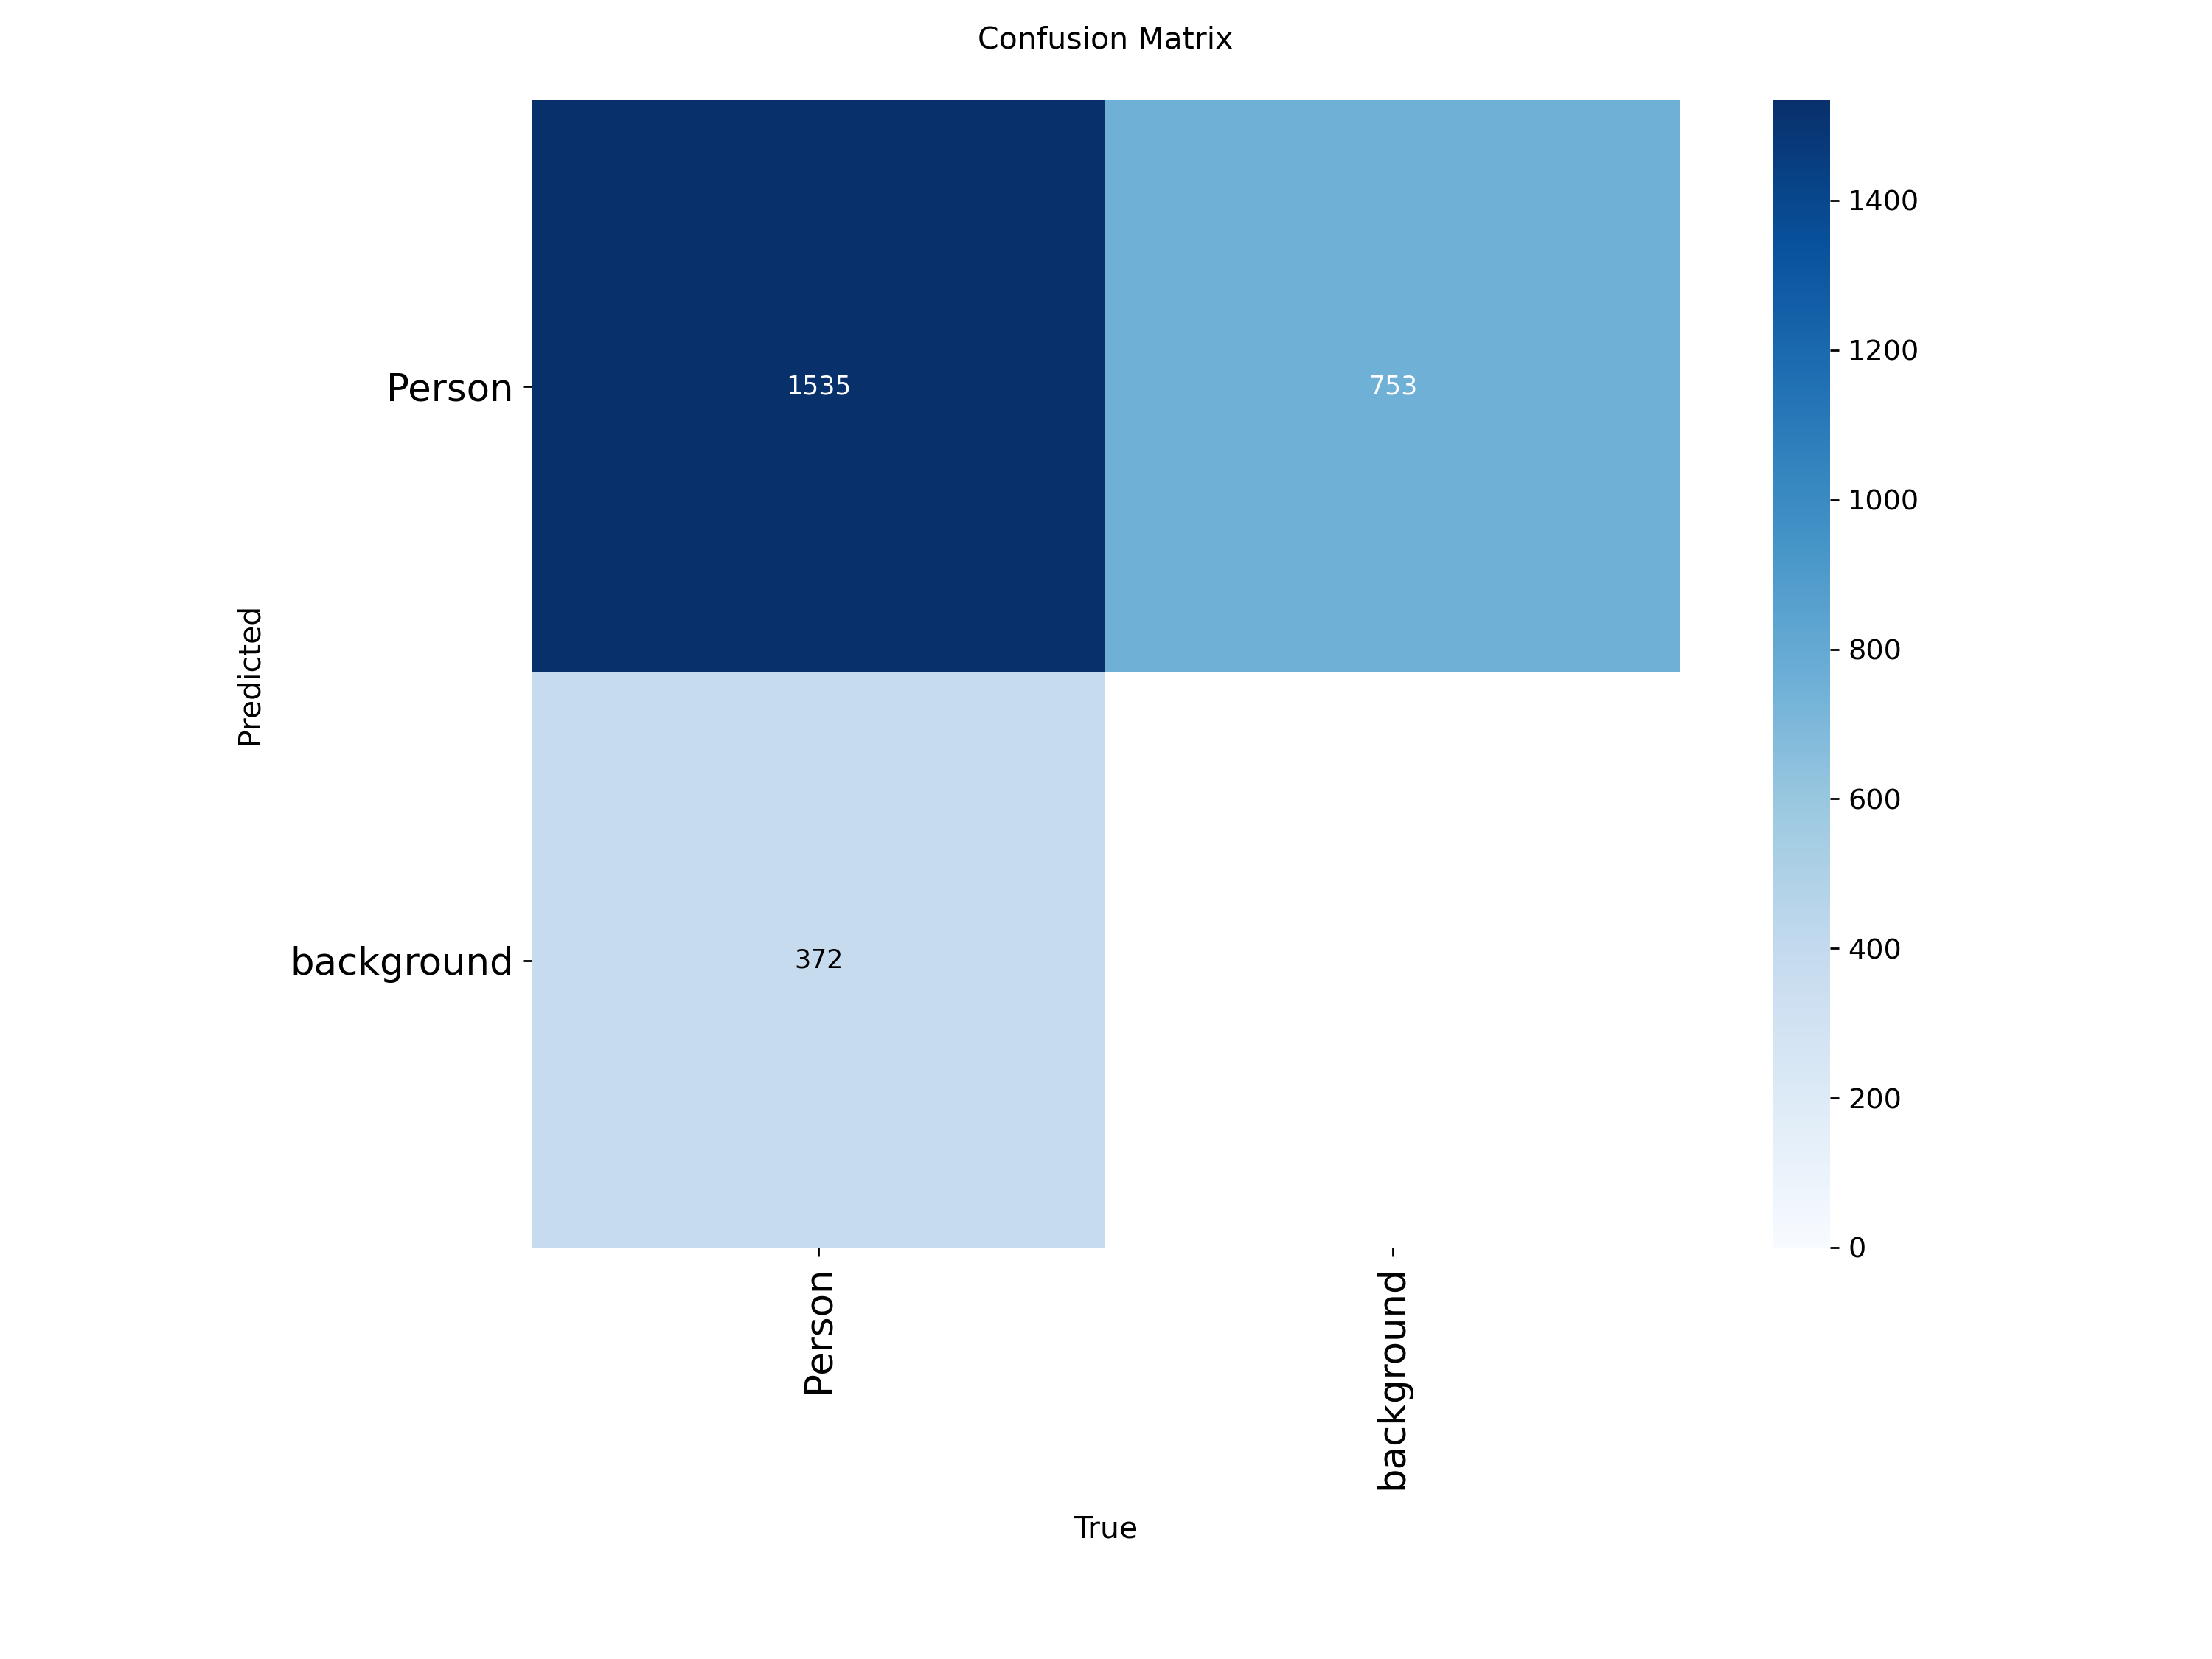

In [ ]:
Image(filename=f'/content/runs/detect/people_yolov8/confusion_matrix.png', width=600)

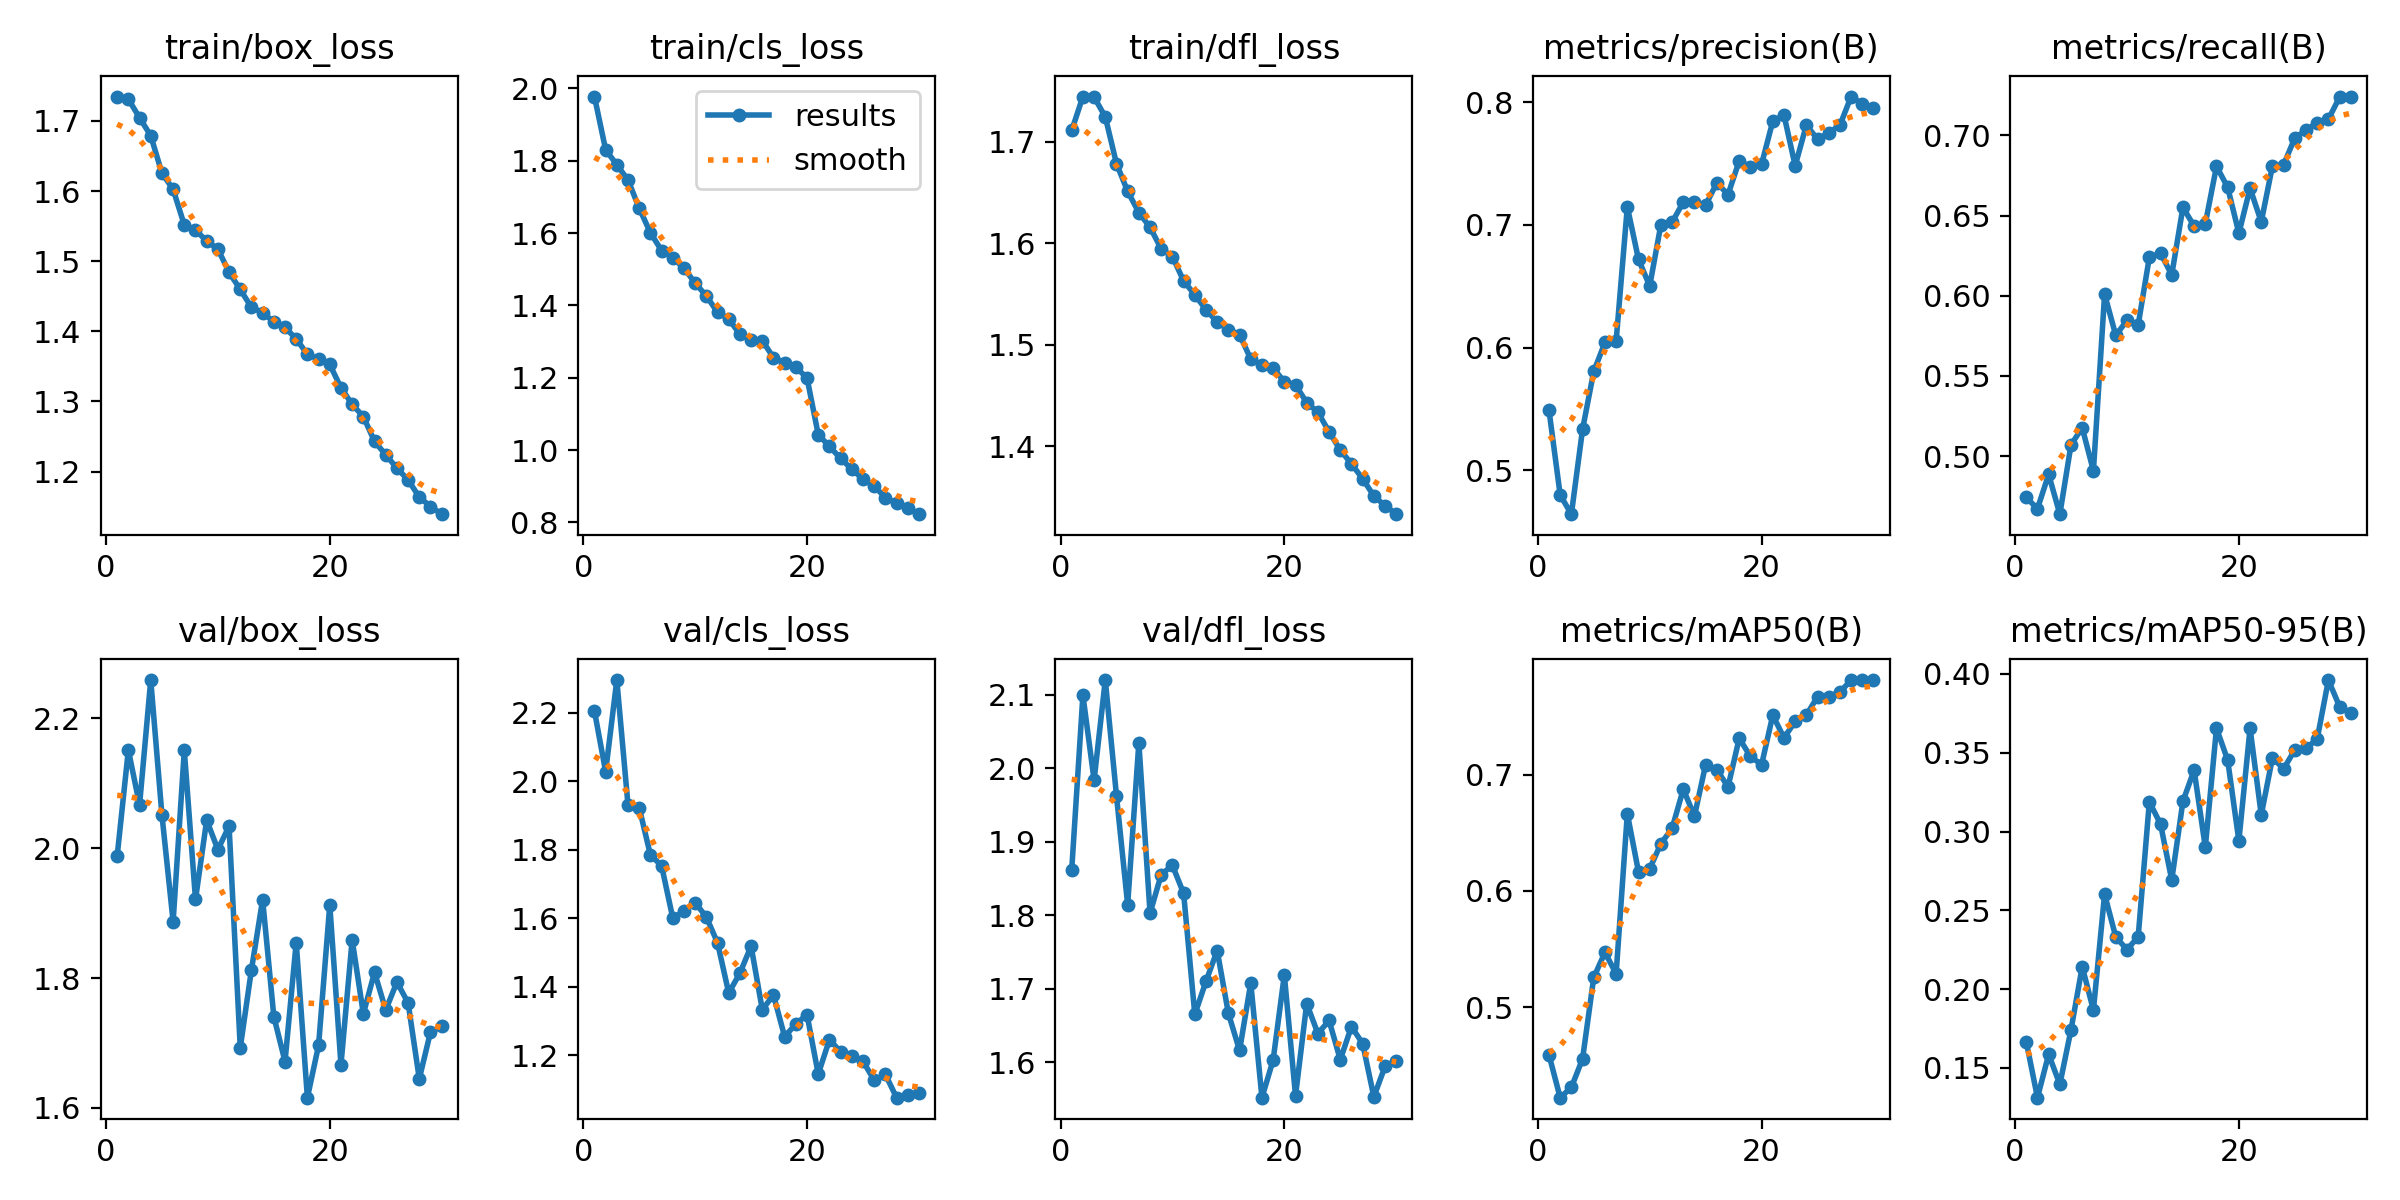

In [ ]:
Image(filename=f'/content/runs/detect/people_yolov8/results.png', width=600)

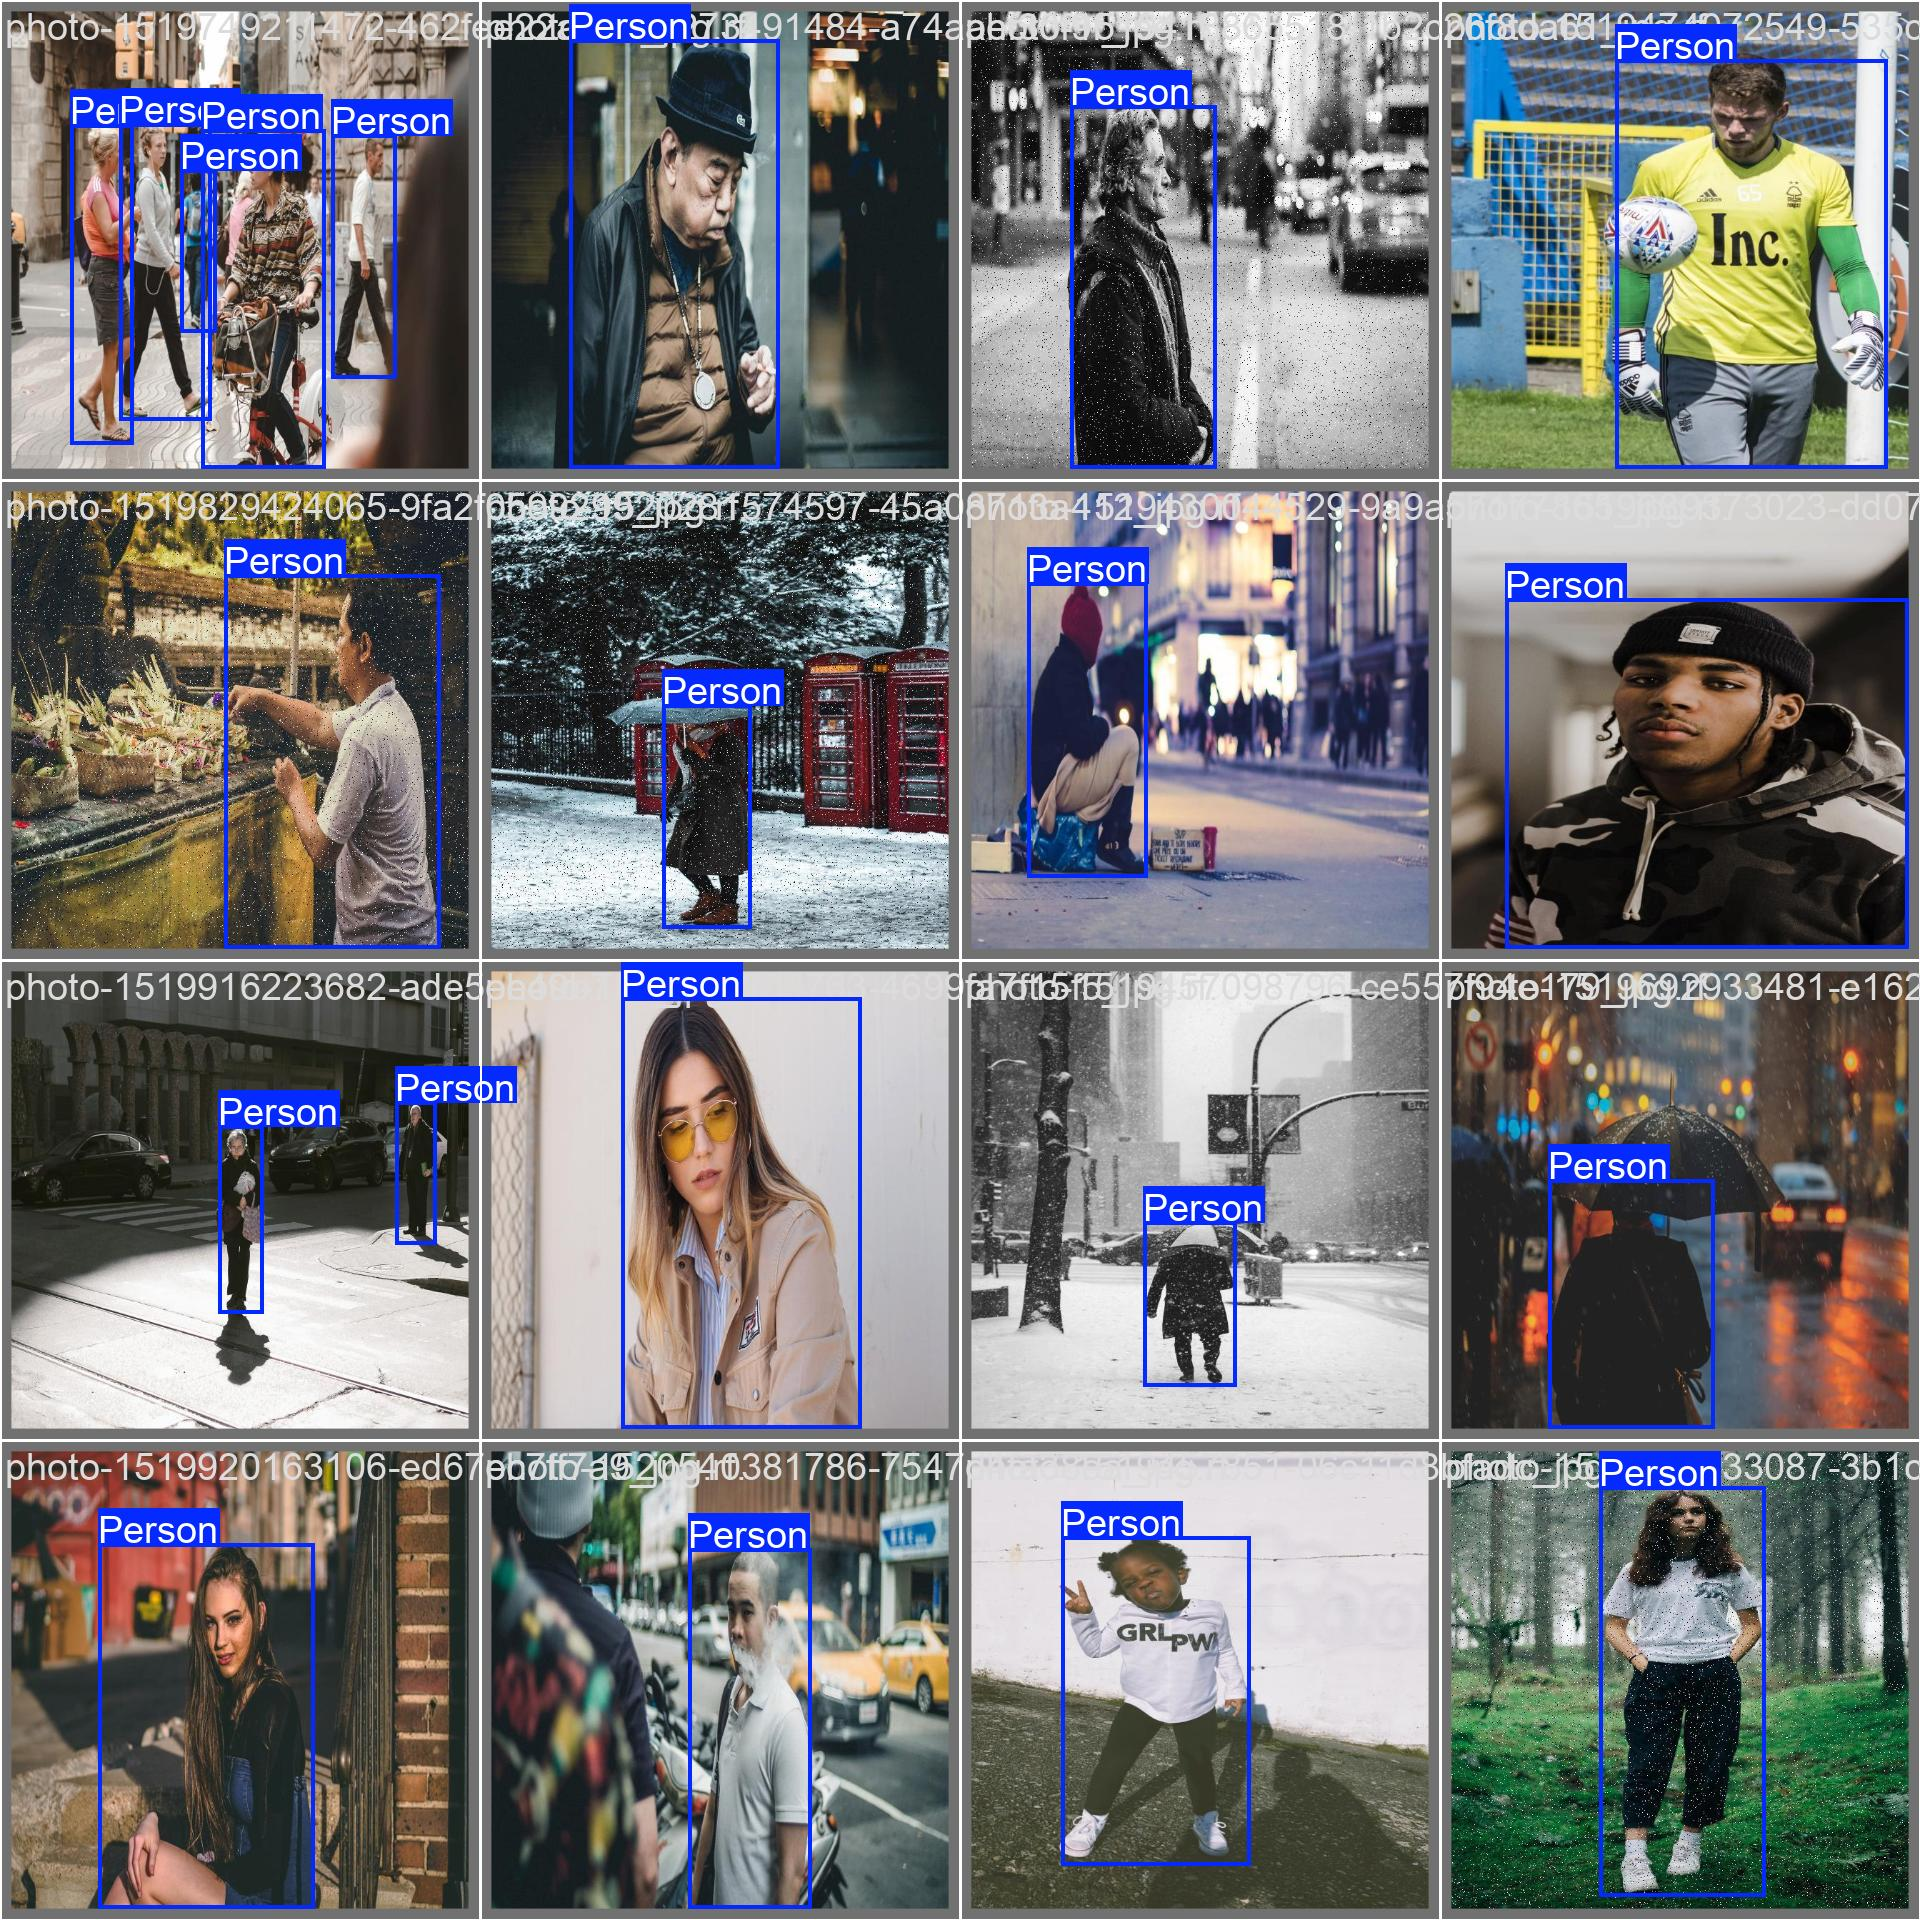

In [ ]:
Image(filename=f'/content/runs/detect/people_yolov8/val_batch0_labels.jpg', width=600)

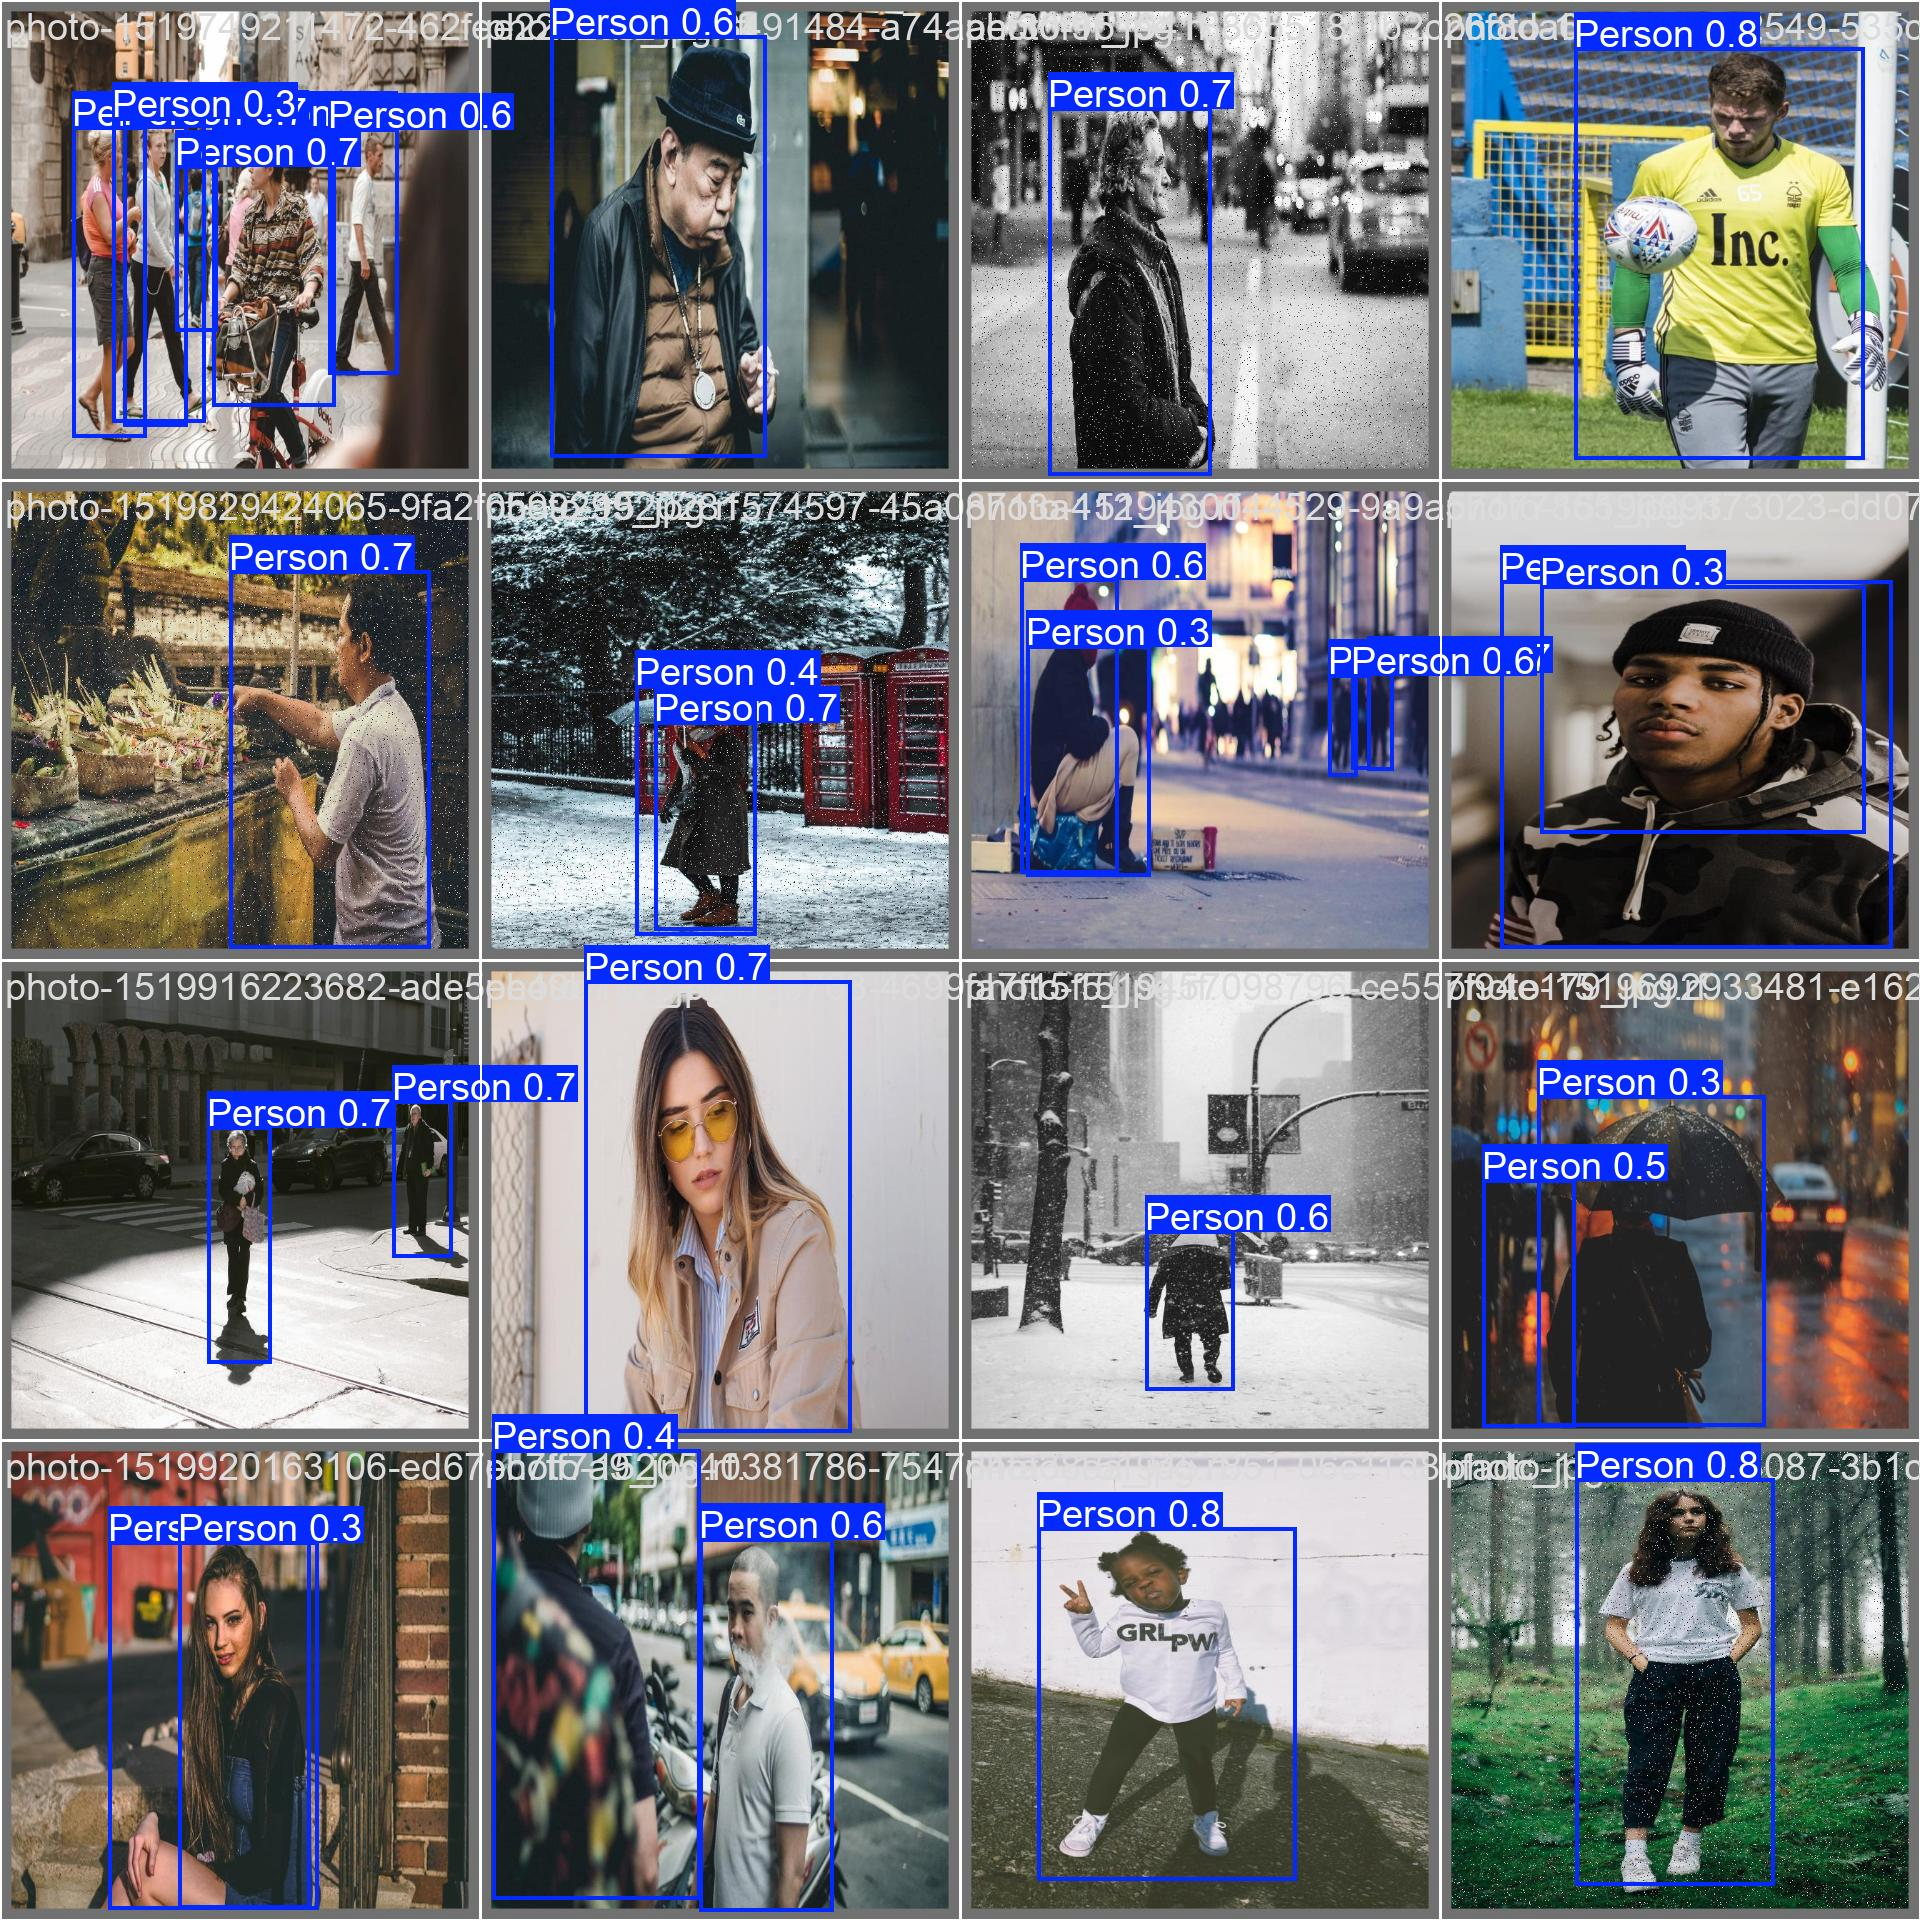

In [ ]:
Image(filename=f'/content/runs/detect/people_yolov8/val_batch0_pred.jpg', width=600)

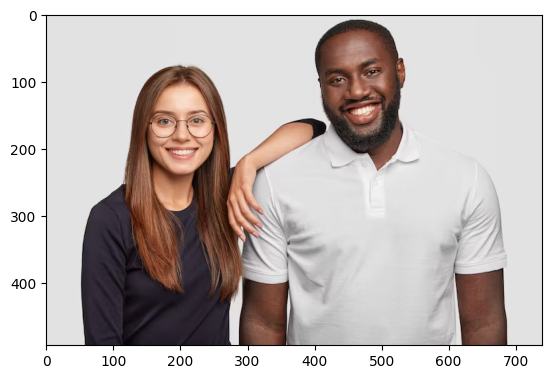

In [ ]:
im = Img.open('/content/изображение_2025-11-15_201453076.png')
plt.imshow(im)
plt.show()

In [ ]:
results = model(im)


0: 448x640 2 Persons, 75.3ms
Speed: 3.4ms preprocess, 75.3ms inference, 2.7ms postprocess per image at shape (1, 3, 448, 640)


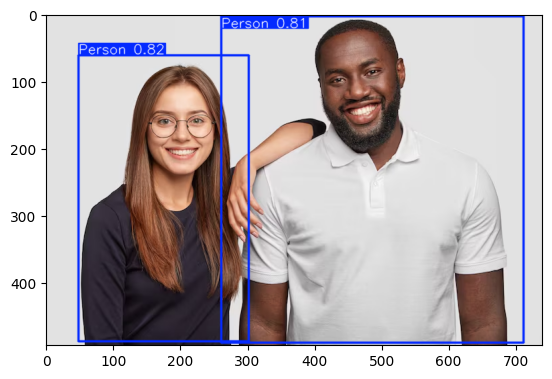

In [ ]:
for r in results:
    im_array = r.plot()
    im = Img.fromarray(im_array[..., ::-1])
    plt.imshow(im)
    plt.show()